# Allegheny County Jail Statistics

## Author: Solomon Heisey

### Goal
The goal of this project is to expose statistical trends present at the Allegheny County Jail from 2015 to 2021. DISCLAIMER:
The goal of this project is not to hypothesize why certain trends appear, rather, it is designed to educate others about
the presence of these trends. The dataset used in the project is the result of over 5,000,000 records which have been collected
though daily jail censuses. The dataset has been provided by the Western Pennsylvania Regional Data Center.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

For the sake of interactive display in Jupyter, matplotlib will be enabled inline.

In [5]:
%matplotlib inline

### Gender, Age, and Race Breakdown by Month

<AxesSubplot:title={'center':'Race Breakdown by Month'}, xlabel='Month', ylabel='Total Inmates'>

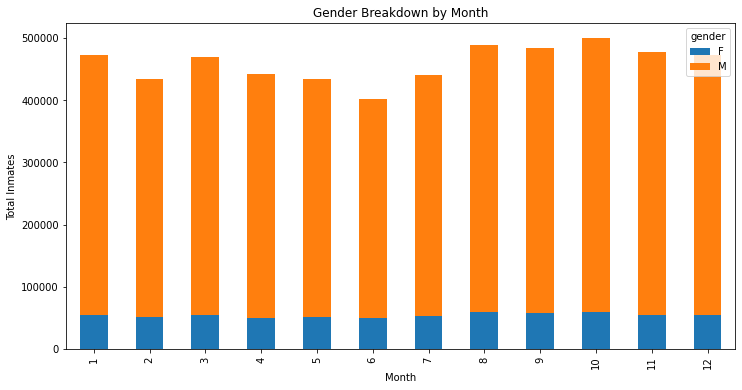

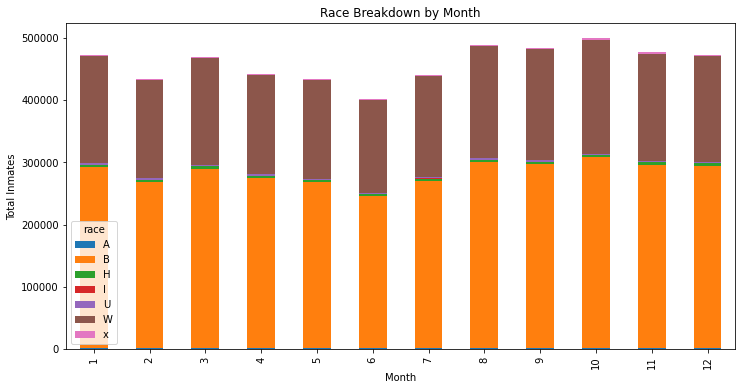

In [6]:

url = 'http://tools.wprdc.org/downstream/66cdcd57-6c92-4aaa-8800-0ed9d8f03e22'
file_name = './data.csv'

try:
    df_all = pd.read_csv('data.csv', sep=',', engine='python', parse_dates=['census_date'])
except FileNotFoundError:
    df_all = pd.read_csv(url, sep=',', engine='python', parse_dates=['census_date'])
    df_all.to_csv(file_name)

df_all['census_month'] = df_all['census_date'].dt.month
df_all['census_year'] = df_all['census_date'].dt.year

df_gender_month = df_all.groupby(['census_month', 'gender'])['gender'].count().unstack()
df_gender_month.plot(kind='bar', stacked=True, ylabel='Total Inmates', xlabel='Month', title='Gender Breakdown by Month',
                     figsize= (12,6))


df_race_month = df_all.groupby(['census_month', 'race'])['race'].count().unstack()
df_race_month.plot(kind='bar', stacked=True, ylabel='Total Inmates', xlabel='Month', title='Race Breakdown by Month',
                     figsize= (12,6))
